In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/filtered.csv")
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: >

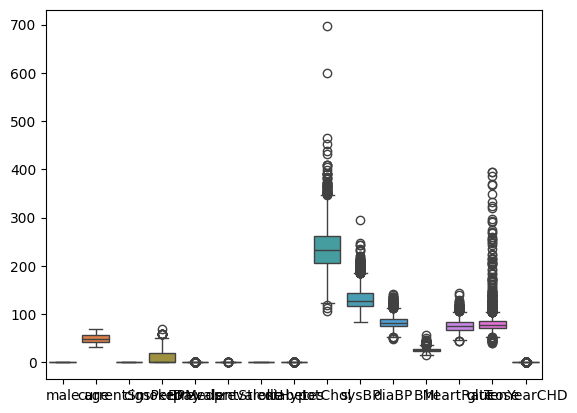

In [4]:
sns.boxplot(df)

In [5]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
X = df.drop(["TenYearCHD"],axis = 1)
y = df["TenYearCHD"]


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
pd.DataFrame(X_train).isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3176,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3177,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3178,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [11]:
models = {
    # "LinearRegression":LinearRegression(),
    "K Neighbour":KNeighborsClassifier(),
    "DecisionTree":DecisionTreeClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "GradientBoostint":GradientBoostingClassifier(),
    "XGBOOST":XGBClassifier()
}

In [12]:
for i in range(len(models)):
    model = models[list(models.keys())[i]]
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    print("================")
    print("Model Name: ",list(models.keys())[i])
    # Metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))

Model Name:  K Neighbour
Accuracy: 0.8386792452830188
Precision: 0.2777777777777778
Recall: 0.06451612903225806
F1 Score: 0.10471204188481675
ROC-AUC: 0.5178934236321512
Model Name:  DecisionTree
Accuracy: 0.7650943396226415
Precision: 0.20625
Recall: 0.2129032258064516
F1 Score: 0.20952380952380953
ROC-AUC: 0.5362858670468722
Model Name:  AdaBoost
Accuracy: 0.8566037735849057
Precision: 0.7142857142857143
Recall: 0.03225806451612903
F1 Score: 0.06172839506172839
ROC-AUC: 0.5150240598823739
Model Name:  GradientBoostint
Accuracy: 0.8471698113207548
Precision: 0.3870967741935484
Recall: 0.07741935483870968
F1 Score: 0.12903225806451613
ROC-AUC: 0.528212439850294
Model Name:  XGBOOST
Accuracy: 0.8358490566037736
Precision: 0.3389830508474576
Recall: 0.12903225806451613
F1 Score: 0.18691588785046728
ROC-AUC: 0.5429691677062911


In [13]:
pd.DataFrame(X_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [14]:
#fine Tuning
param_grid_ada = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.001, 0.01, 0.1, 0.5, 1.0]
}
param_grid_gb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 5],
    "subsample": [0.7, 0.8, 1.0]
}

In [15]:
random_cv = [
    ("AdaBoost",AdaBoostClassifier(),param_grid_ada),
    ("GradientBoost",GradientBoostingClassifier(),param_grid_gb)
]

In [16]:
from sklearn.model_selection import RandomizedSearchCV


In [17]:
model_param = {}
for name,model,param in random_cv:
    random = RandomizedSearchCV(estimator=model,param_distributions=param,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/shubham/Desktop/HeartDiseasePrediction/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/shubham/Desktop/HeartDiseasePrediction/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [18]:
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for AdaBoost -------------------
{'n_estimators': 50, 'learning_rate': 0.001}
---------------- Best Params for GradientBoost -------------------
{'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}


In [19]:
models = {
    "AdaBoost":AdaBoostClassifier(n_estimators= 50, learning_rate= 0.001),
    "GradientBoostint":GradientBoostingClassifier(subsample= 0.8, n_estimators= 300, max_depth=3, learning_rate=0.01)
}

In [20]:
for i in range(len(models)):
    model = models[list(models.keys())[i]]
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    print("================")
    print("Model Name: ",list(models.keys())[i])
    # Metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))

Model Name:  AdaBoost
Accuracy: 0.8537735849056604
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5


/home/shubham/Desktop/HeartDiseasePrediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Model Name:  GradientBoostint
Accuracy: 0.8584905660377359
Precision: 0.6666666666666666
Recall: 0.06451612903225806
F1 Score: 0.11764705882352941
ROC-AUC: 0.5294956335769024


In [21]:
gb=GradientBoostingClassifier(subsample= 0.8, n_estimators= 300, max_depth=3, learning_rate=0.01)

In [22]:
gb.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.01
,n_estimators,300
,subsample,0.8
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [23]:
import pickle
with open("../trained_model/model.pkl","wb") as f:
    pickle.dump(gb,f)
with open("../trained_model/scaler.pkl","wb") as f:
    pickle.dump(scaler,f)

[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.7s
[CV] END ..............learning_rate=0.001, n_estimators=300; total time=   2.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.7s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.7s
[CV] END ...............learning_rate=0.01, n_estimators=300; total time=   1.9s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   1.3s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   1.8s
[CV] END ................learning_rate=0.5, n_estimators=200; total time=   1.2s
[CV] END .................learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END .................le